In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/dataset.csv")

KIỂM TRA DỮ LIỆU

In [7]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
#Thống kê mô tả
df.describe()

NameError: name 'df' is not defined

LÀM SẠCH DỮ LIỆU

In [ ]:
#Thêm 0 vào các dữ liệu trống
df = df.fillna(0)

In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0,0
4,92056,34377,33,19.0,0.00,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,0


In [ ]:
num_datatype =0
cat_datatype =0
other=0

for col in df.columns:
    if df[col].dtypes == "int64" or df[col].dtypes == "float64":
        num_datatype += 1
    elif df[col].dtypes == "object":
        cat_datatype += 1
print("Number of Numeric Columns:", num_datatype)
print("Number of Categorical Columns:", cat_datatype)

Number of Numeric Columns: 78
Number of Categorical Columns: 7


In [ ]:
#Đổi các ký tự lỗi
df = df.replace(',', '', regex=True)
df = df.replace('    ','',regex=True)
#df = df.replace(' ','',regex=True)
df = df.replace('\(','',regex=True)
df = df.replace('\)','',regex=True)

In [ ]:
#Chuyển các chuỗi số thành số
df.iloc[:, [2,3,4,5,6,7]] =  df.iloc[:, [2,3,4,5,6,7]].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            91713 non-null  float64
 4   bmi                            91713 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      1395 non-null   object 
 7   gender                         25 non-null     object 
 8   height                         91713 non-null  float64
 9   icu_admit_source               91713 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
#Số dữ liệu trống
df.isna().sum()

,0
encounter_id,0
patient_id,0
hospital_id,0
age,0
bmi,0
...,...
solid_tumor_with_metastasis,0
apache_3j_bodysystem,0
apache_2_bodysystem,0
Unnamed: 83,0


In [ ]:
feature = ["age", "gender", "bmi", "apache_4a_hospital_death_prob", "heart_rate_apache", "map_apache", "temp_apache", "d1_glucose_max", "d1_potassium_max", "gcs_eyes_apache", "gcs_motor_apache", "gcs_verbal_apache", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "solid_tumor_with_metastasis"]

X = df[feature]
y = df["hospital_death"]

In [ ]:
Q1 = df[feature].select_dtypes(include=np.number).quantile(0.25)
Q3 = df[feature].select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

numeric_features = df[feature].select_dtypes(include=np.number).columns
outliers = df[(df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))]


<ipython-input-40-3cdcb8d88df4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='apache_2_bodysystem', palette="dark", ax=axs[0])
<ipython-input-40-3cdcb8d88df4>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)


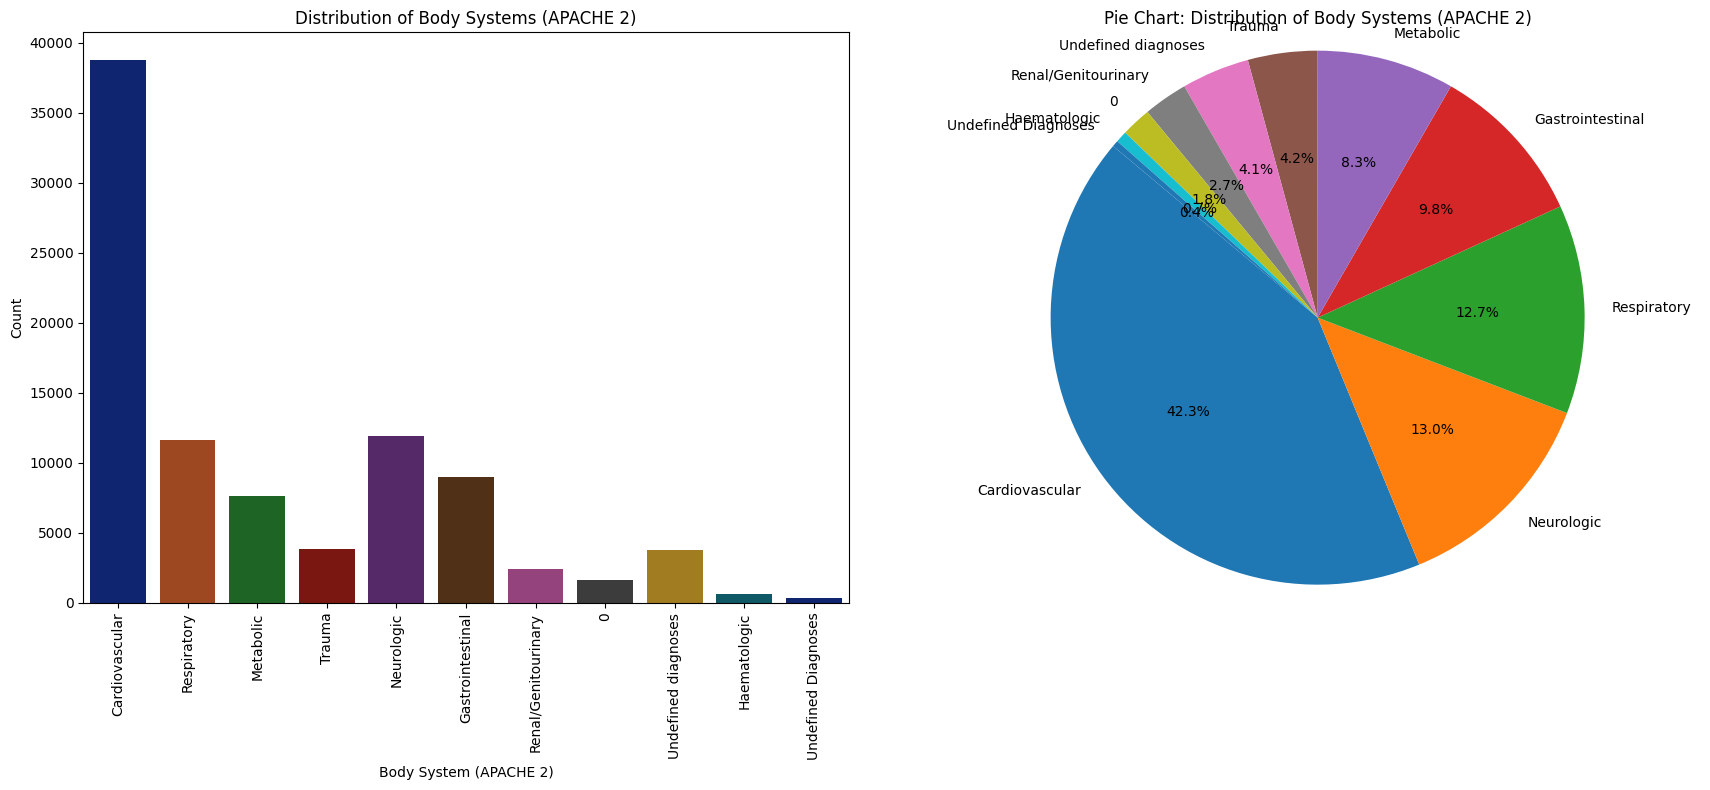

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=df, x='apache_2_bodysystem', palette="dark", ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Body System (APACHE 2)')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Body Systems (APACHE 2)')

counts = df['apache_2_bodysystem'].value_counts()
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart: Distribution of Body Systems (APACHE 2)')
axs[1].axis('equal')
plt.tight_layout()
plt.show()

PHÂN TÍCH DỮ LIỆU